# <span style='font-family:"Times New Roman"'> <span styel=''> **CANCER EXPLORATION**

<span style='font-family:"Times New Roman"'> <span styel=''> *Emile Cohen* 
        
*March 2020*

**Goal:** In this notebook, we have all the visualizations of the cohort based on the cancer types. In the future, we will create Visual Summaries for each cancer.
    
The Notebook is divided in X parts:
   
* **1. Cancer Discovery**
* **2. Metrics Panels per Cancer Type**


**NB1:** In each part, you must run the cells from the begining in order to initialize the variables

**NB2:** All functions used for the plots are located in utils/custom_tools.py

---

In [100]:
%run -i '../../utils/setup_environment.ipy'
from utils.analysis_tools import *

import warnings, math
warnings.filterwarnings('ignore')
import ptitprince as pt
import IPython.display
from utils.lca_standard_graphs import *

data_path = '../../data/'

Setup environment... done!


<span style="color:green">✅ Working on **mskimpact_env** conda environment.</span>

---
# Cancer Discovery

## Cancer Type proportion in the cohort

In [101]:
master = pd.read_pickle(data_path + 'merged_data/master_file.pkl')
cancer_count = get_groupby(master, 'Cancer_Type', 'count').sort_values(by=['count'], ascending=False)
cancer_count

,count
Cancer_Type,
Non-Small Cell Lung Cancer,4228
Breast Cancer,4148
Colorectal Cancer,2972
Prostate Cancer,1595
Glioma,1581
Pancreatic Cancer,1485
Melanoma,1094
Endometrial Cancer,1042
Soft Tissue Sarcoma,1039


### Subgroup per cancer type

(<Figure size 1500x1300 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11848cdd0>)

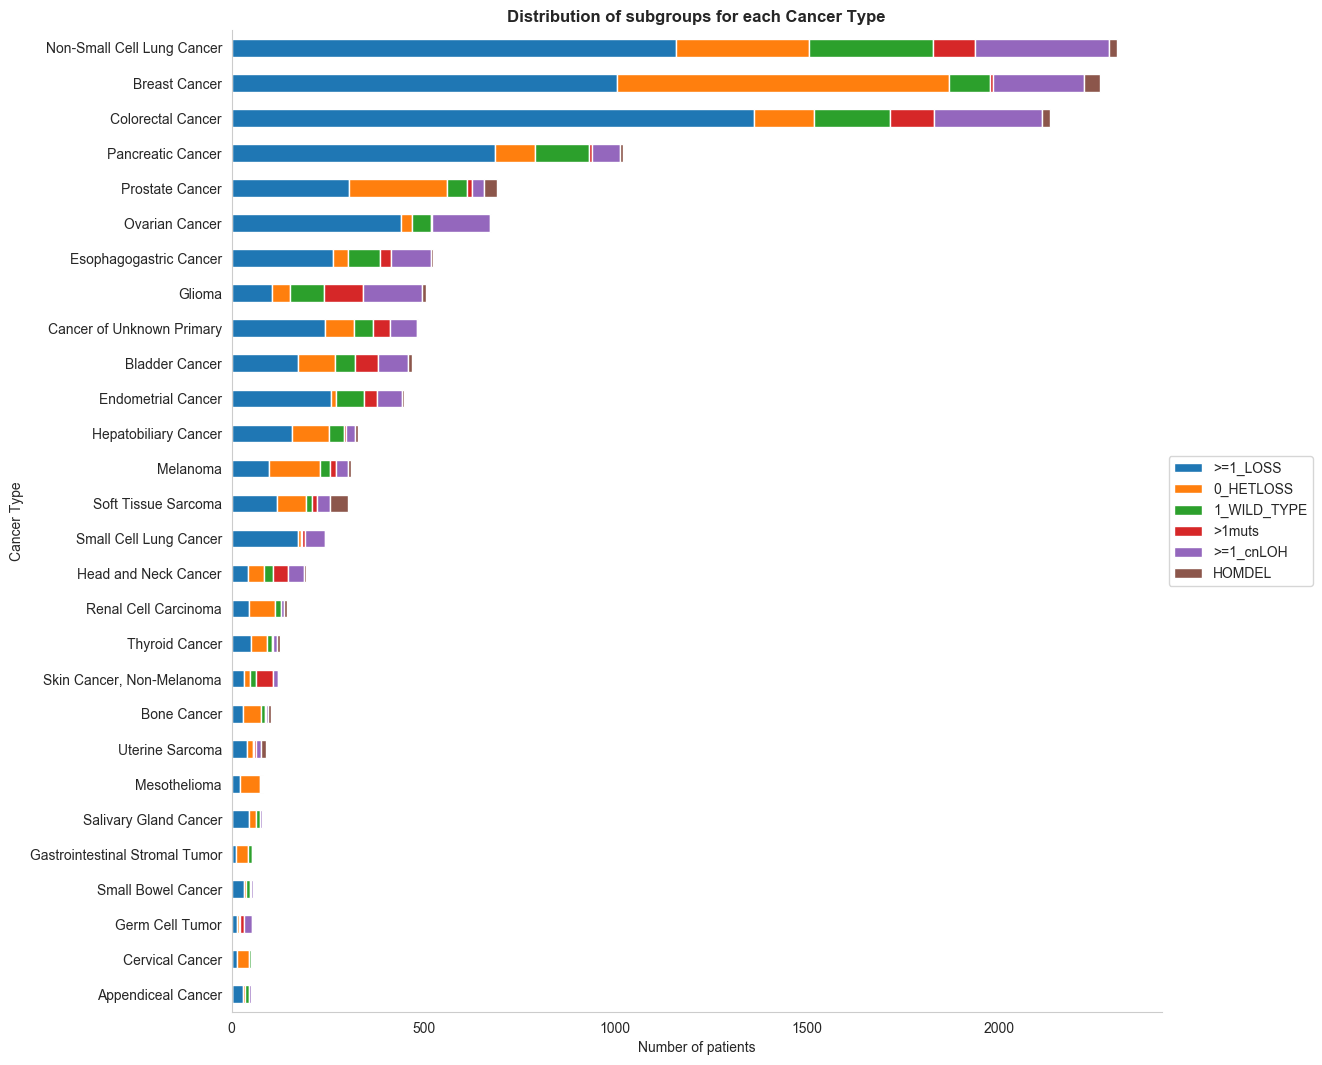

In [3]:
master = pd.read_pickle(data_path + 'merged_data/master_file.pkl')
master_cancer = master[['Cancer_Type', 'mut_cn_group']]
count = pd.DataFrame(pd.DataFrame(master_cancer.groupby(['Cancer_Type','mut_cn_group']).size(), columns=['count'])).unstack()#.groupby(['mut_cn_group','Cancer_Type']).sum()).unstack().sort_values(by=[('count',0)])
count['sum'] = count.sum(axis=1)
count = count[count[('sum','')]>=50]

count = count.sort_values(by=['sum'], ascending=True)[[('count',    '>=1_LOSS'),
                                                       ('count',   '0_HETLOSS'),
                                                        ('count', '1_WILD_TYPE'),
                                                        ('count',      '>1muts'),
                                                        ('count',   '>=1_cnLOH'),
                                                        ('count',      'HOMDEL')]]

count.columns = ['>=1_LOSS', '0_HETLOSS', '1_WILD_TYPE', '>1muts', '>=1_cnLOH', 'HOMDEL']

# We plot the table
get_mstacked_plot(count, 
                  'Distribution of subgroups for each Cancer Type',
                  ['>=1_LOSS','0_HETLOSS', '1_WILD_TYPE','>1muts','>=1_cnLOH','HOMDEL'],
                  'Number of patients',
                  'Cancer Type',
                  figsize = (15,13),
                  horiz=True)

### Subgroup proportion per cancer type

In [102]:
def create_count_table(df, index, columns, threshold=50, sample_type = None):
    '''
    This function create a count function with 'index' in index and 'columns' in columns, we
    add the ratios and the sum. 
    '''
    df_cancer = df[[index, columns]]
    
    if sample_type:
        df_cancer = df[df['Sample_Type'] == sample_type][[index, columns]]
    
    #cresting the count table
    count = pd.DataFrame(pd.DataFrame(df_cancer.groupby([index, columns]).size(), columns=['count'])).unstack()
    #removing useless level
    count = count.droplevel(None, axis=1)
    
    count['sum'] = count.sum(axis=1)
    count = count[count['sum'] >= threshold]
    count = count.sort_values(by=['sum'], ascending=True)
    count = count.fillna(0)
    
    # We add the ratios
    for column in count.columns:
        count[column + '_r'] = count.apply(lambda x: x[column] / x['sum'] ,axis=1)



    return count

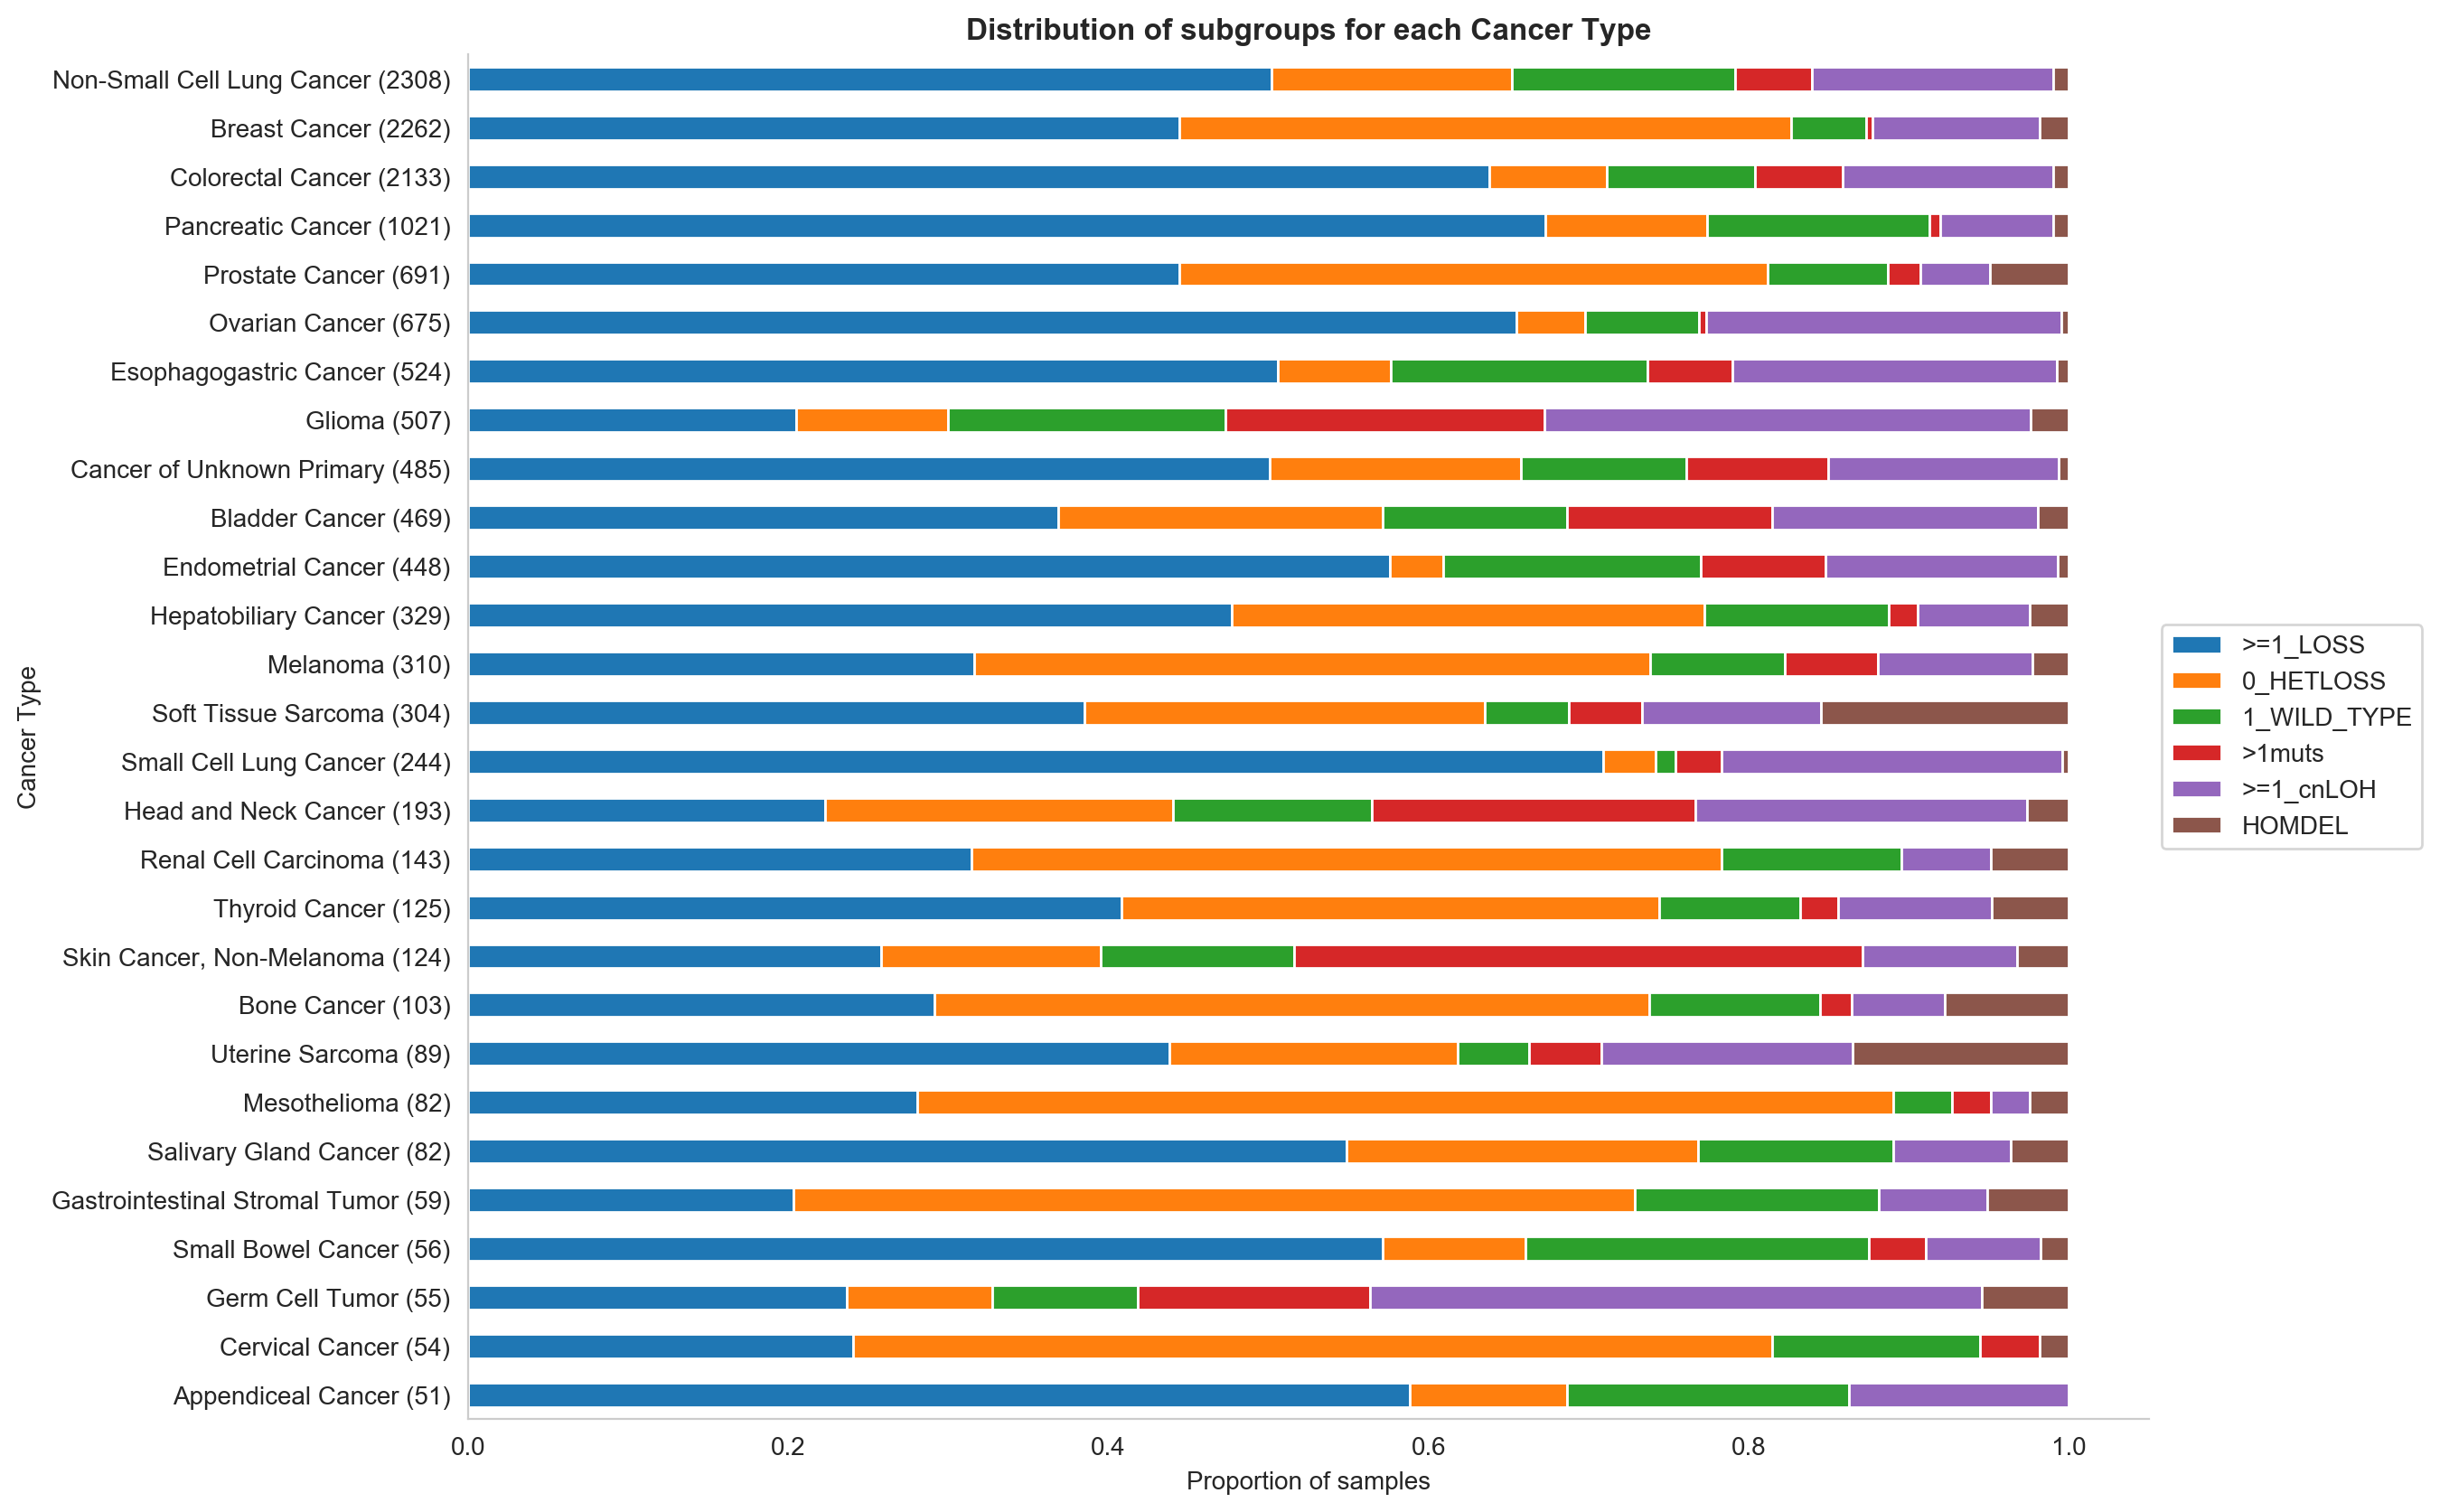

In [104]:
count = create_count_table(master, index='Cancer_Type', columns='tp53_group', threshold=50)

# For the ytick_labels we want to show the number of samples
numbers =  [int(x) for x in list(count['sum'])]
cancer_number = [i + ' (' + str(j) + ')' for i, j in zip(list(count.index), numbers)] 

# We plot the table
fig, ax = get_mstacked_plot(count[['>=1_LOSS_r', '0_HETLOSS_r', '1_WILD_TYPE_r', '>1muts_r', '>=1_cnLOH_r', 'HOMDEL_r']], 
                  'Distribution of subgroups for each Cancer Type',
                  ['>=1_LOSS','0_HETLOSS', '1_WILD_TYPE','>1muts','>=1_cnLOH','HOMDEL'],
                  'Proportion of samples',
                  'Cancer Type',
                  figsize = (15,10),
                  horiz=True)

ax.set_yticklabels(cancer_number, fontsize=10)

plt.show()

### Subgroup proportion  Met / Prim

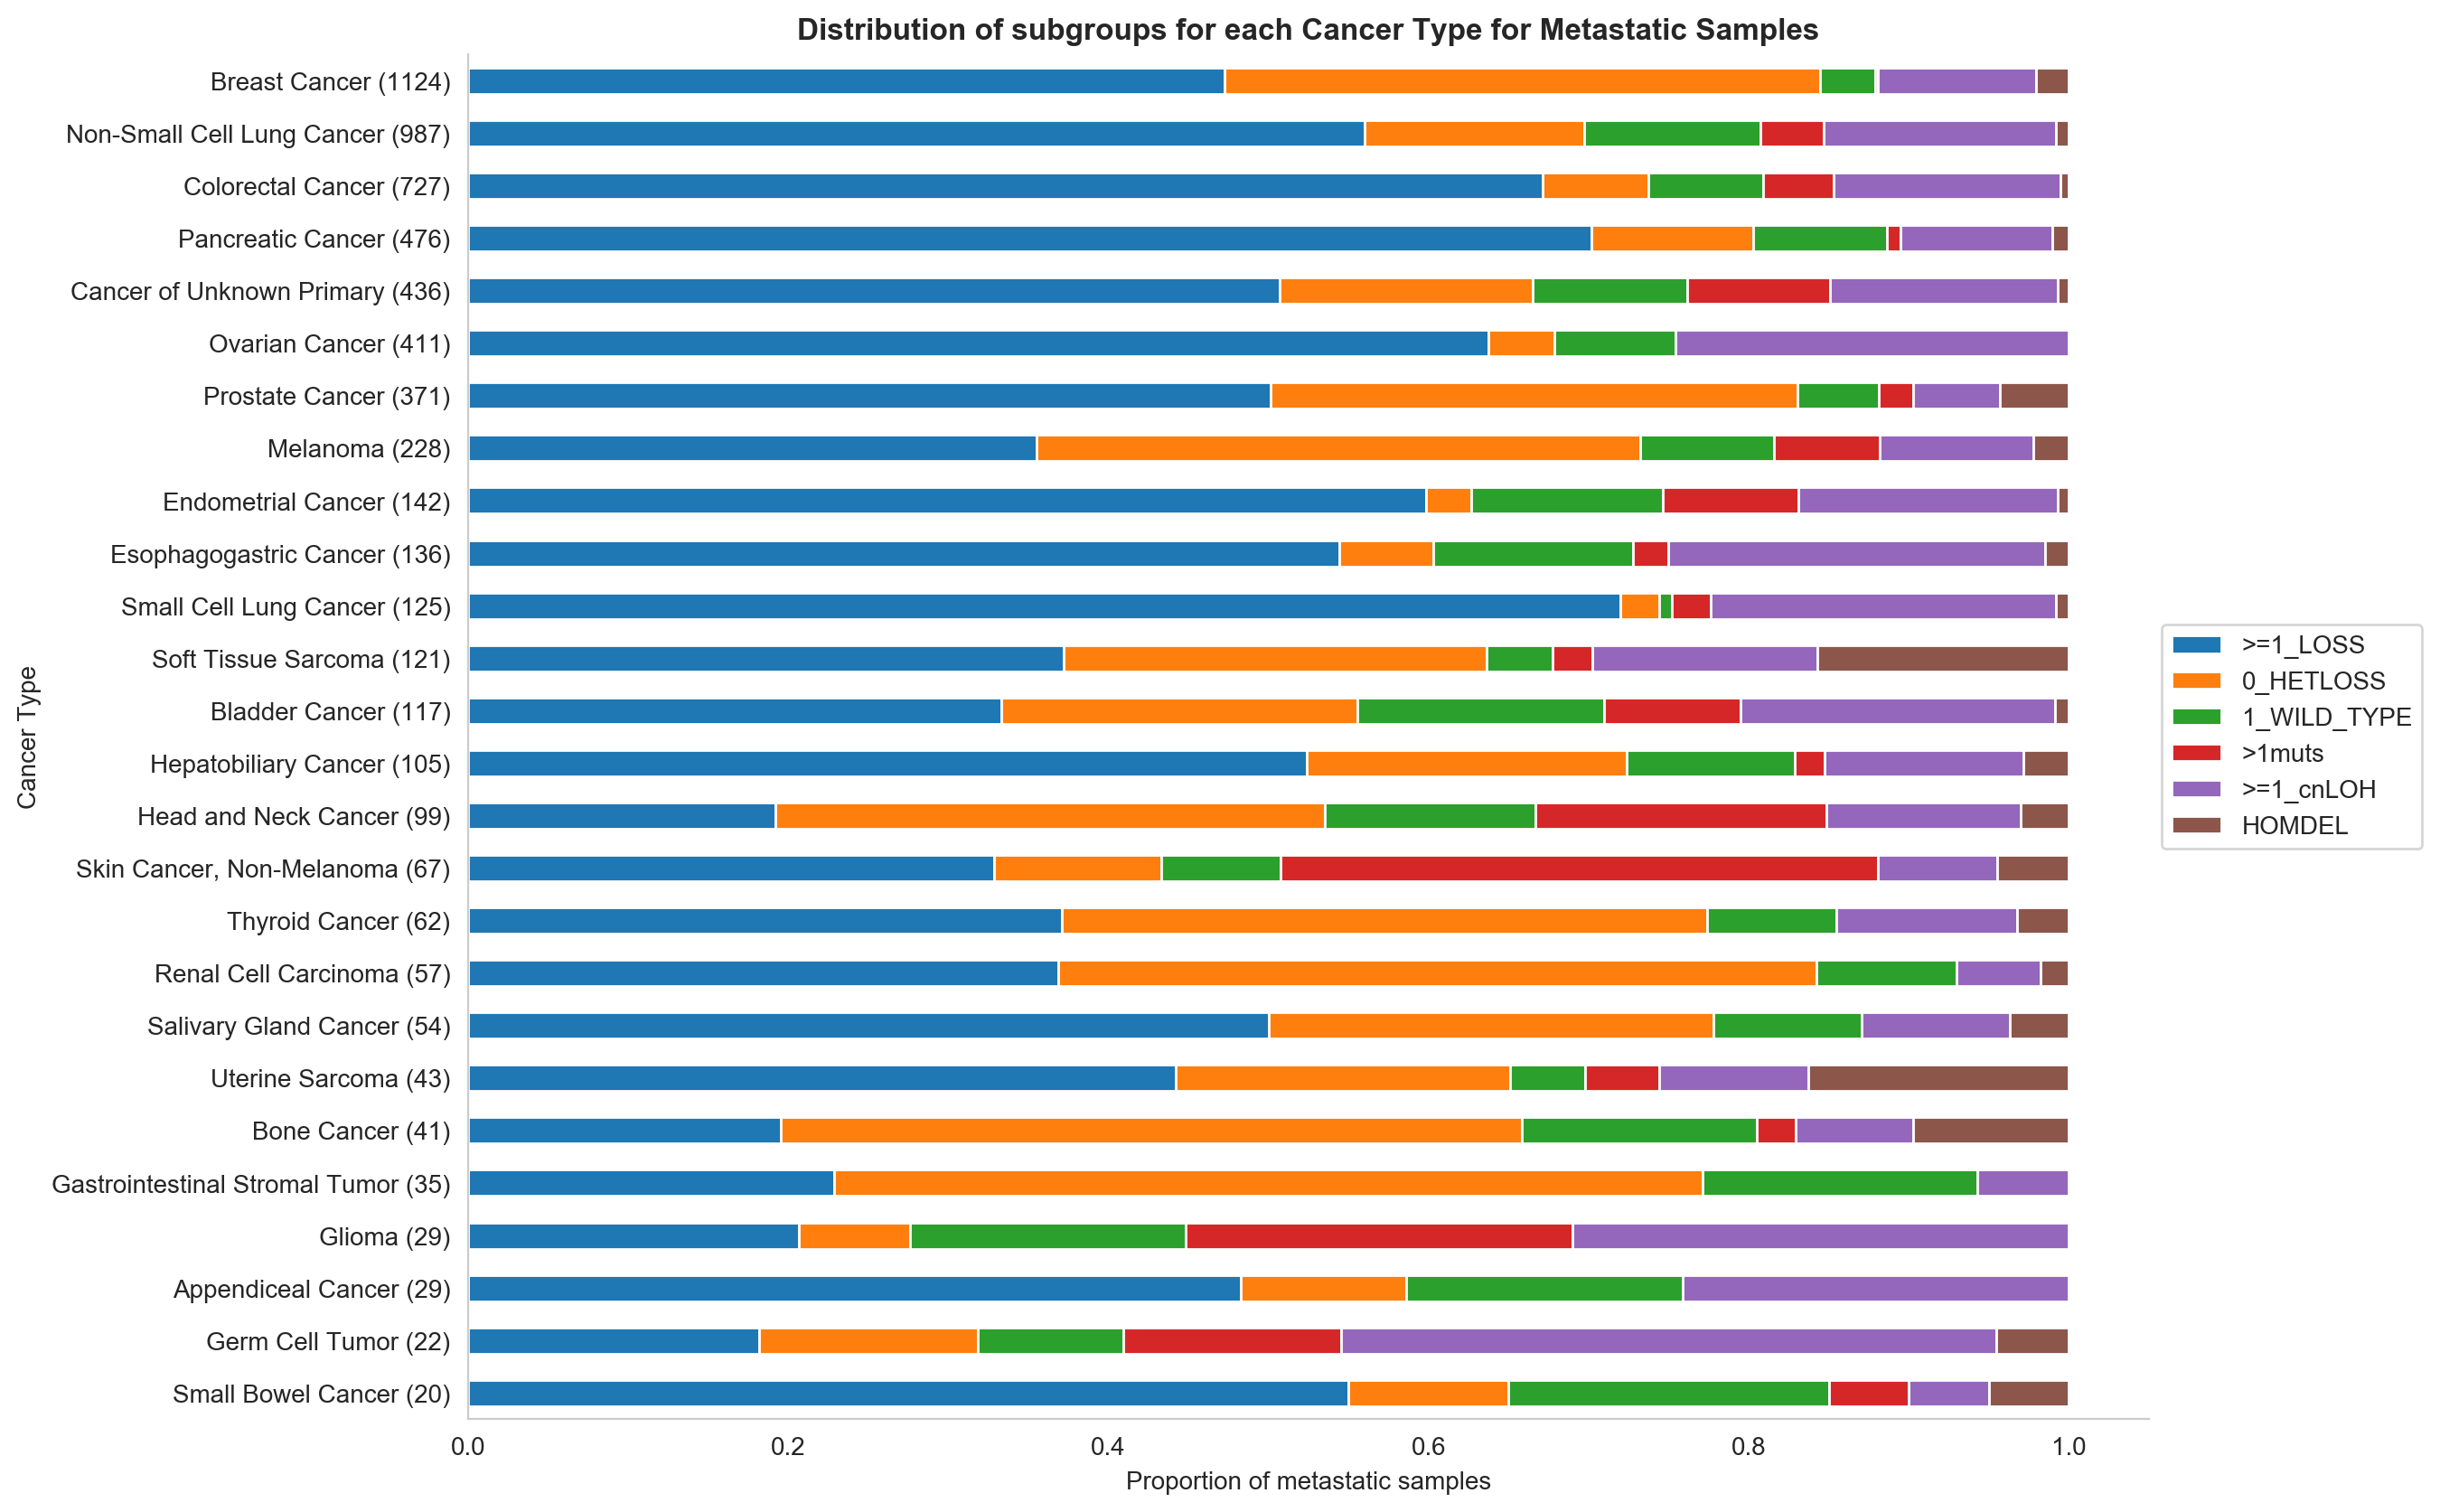

In [106]:
count = create_count_table(master, index='Cancer_Type', columns='tp53_group', sample_type='Metastasis', threshold=20)

numbers =  [int(x) for x in list(count['sum'])]
cancer_number = [i + ' (' + str(j) + ')' for i, j in zip(list(count.index), numbers)] 

# We plot the table
fig, ax = get_mstacked_plot(count[['>=1_LOSS_r', '0_HETLOSS_r', '1_WILD_TYPE_r', '>1muts_r', '>=1_cnLOH_r', 'HOMDEL_r']], 
                  'Distribution of subgroups for each Cancer Type for Metastatic Samples',
                  ['>=1_LOSS','0_HETLOSS', '1_WILD_TYPE','>1muts','>=1_cnLOH','HOMDEL'],
                  'Proportion of metastatic samples',
                  'Cancer Type',
                  figsize = (15,10),
                  horiz=True)

ax.set_yticklabels(cancer_number, fontsize=10)

plt.show()

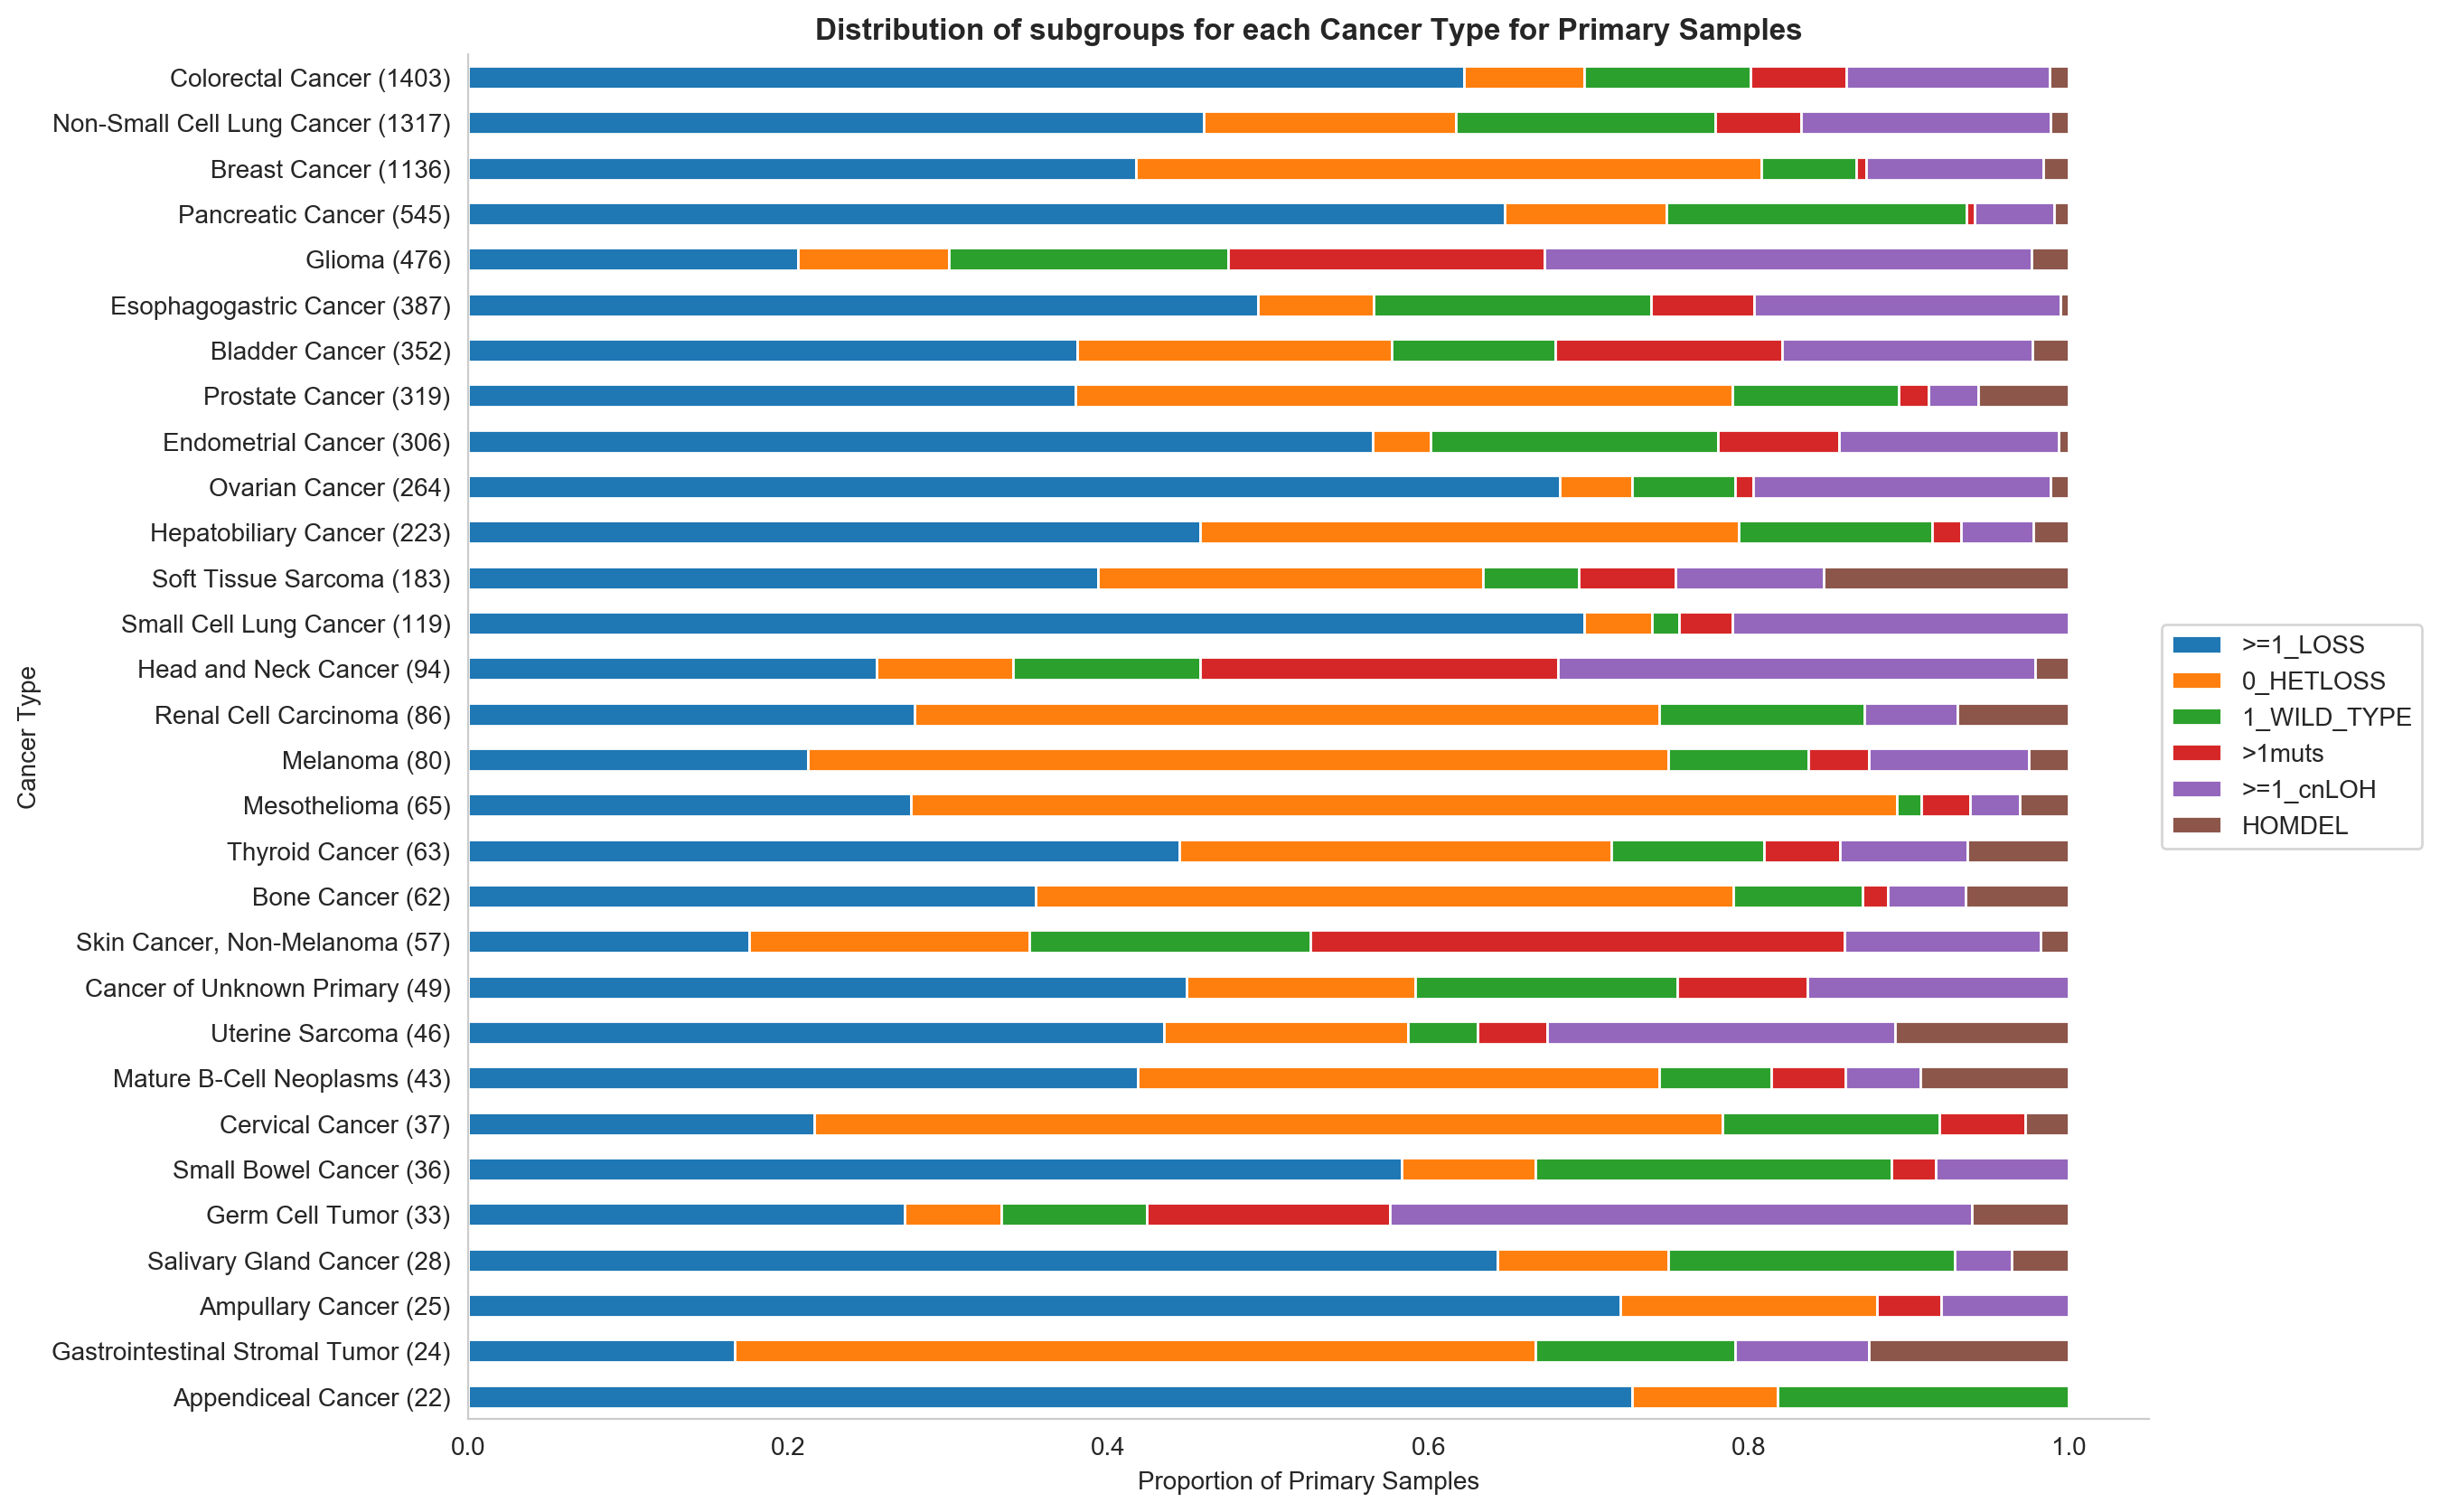

In [107]:
count = create_count_table(master, index='Cancer_Type', columns='tp53_group', sample_type='Primary', threshold=20)



numbers =  [int(x) for x in list(count['sum'])]
cancer_number = [i + ' (' + str(j) + ')' for i, j in zip(list(count.index), numbers)] 

# We plot the table
fig, ax = get_mstacked_plot(count[['>=1_LOSS_r', '0_HETLOSS_r', '1_WILD_TYPE_r', '>1muts_r', '>=1_cnLOH_r', 'HOMDEL_r']], 
                  'Distribution of subgroups for each Cancer Type for Primary Samples',
                  ['>=1_LOSS','0_HETLOSS', '1_WILD_TYPE','>1muts','>=1_cnLOH','HOMDEL'],
                  'Proportion of Primary Samples',
                  'Cancer Type',
                  figsize = (15,10),
                  horiz=True)

ax.set_yticklabels(cancer_number, fontsize=10)

plt.show()

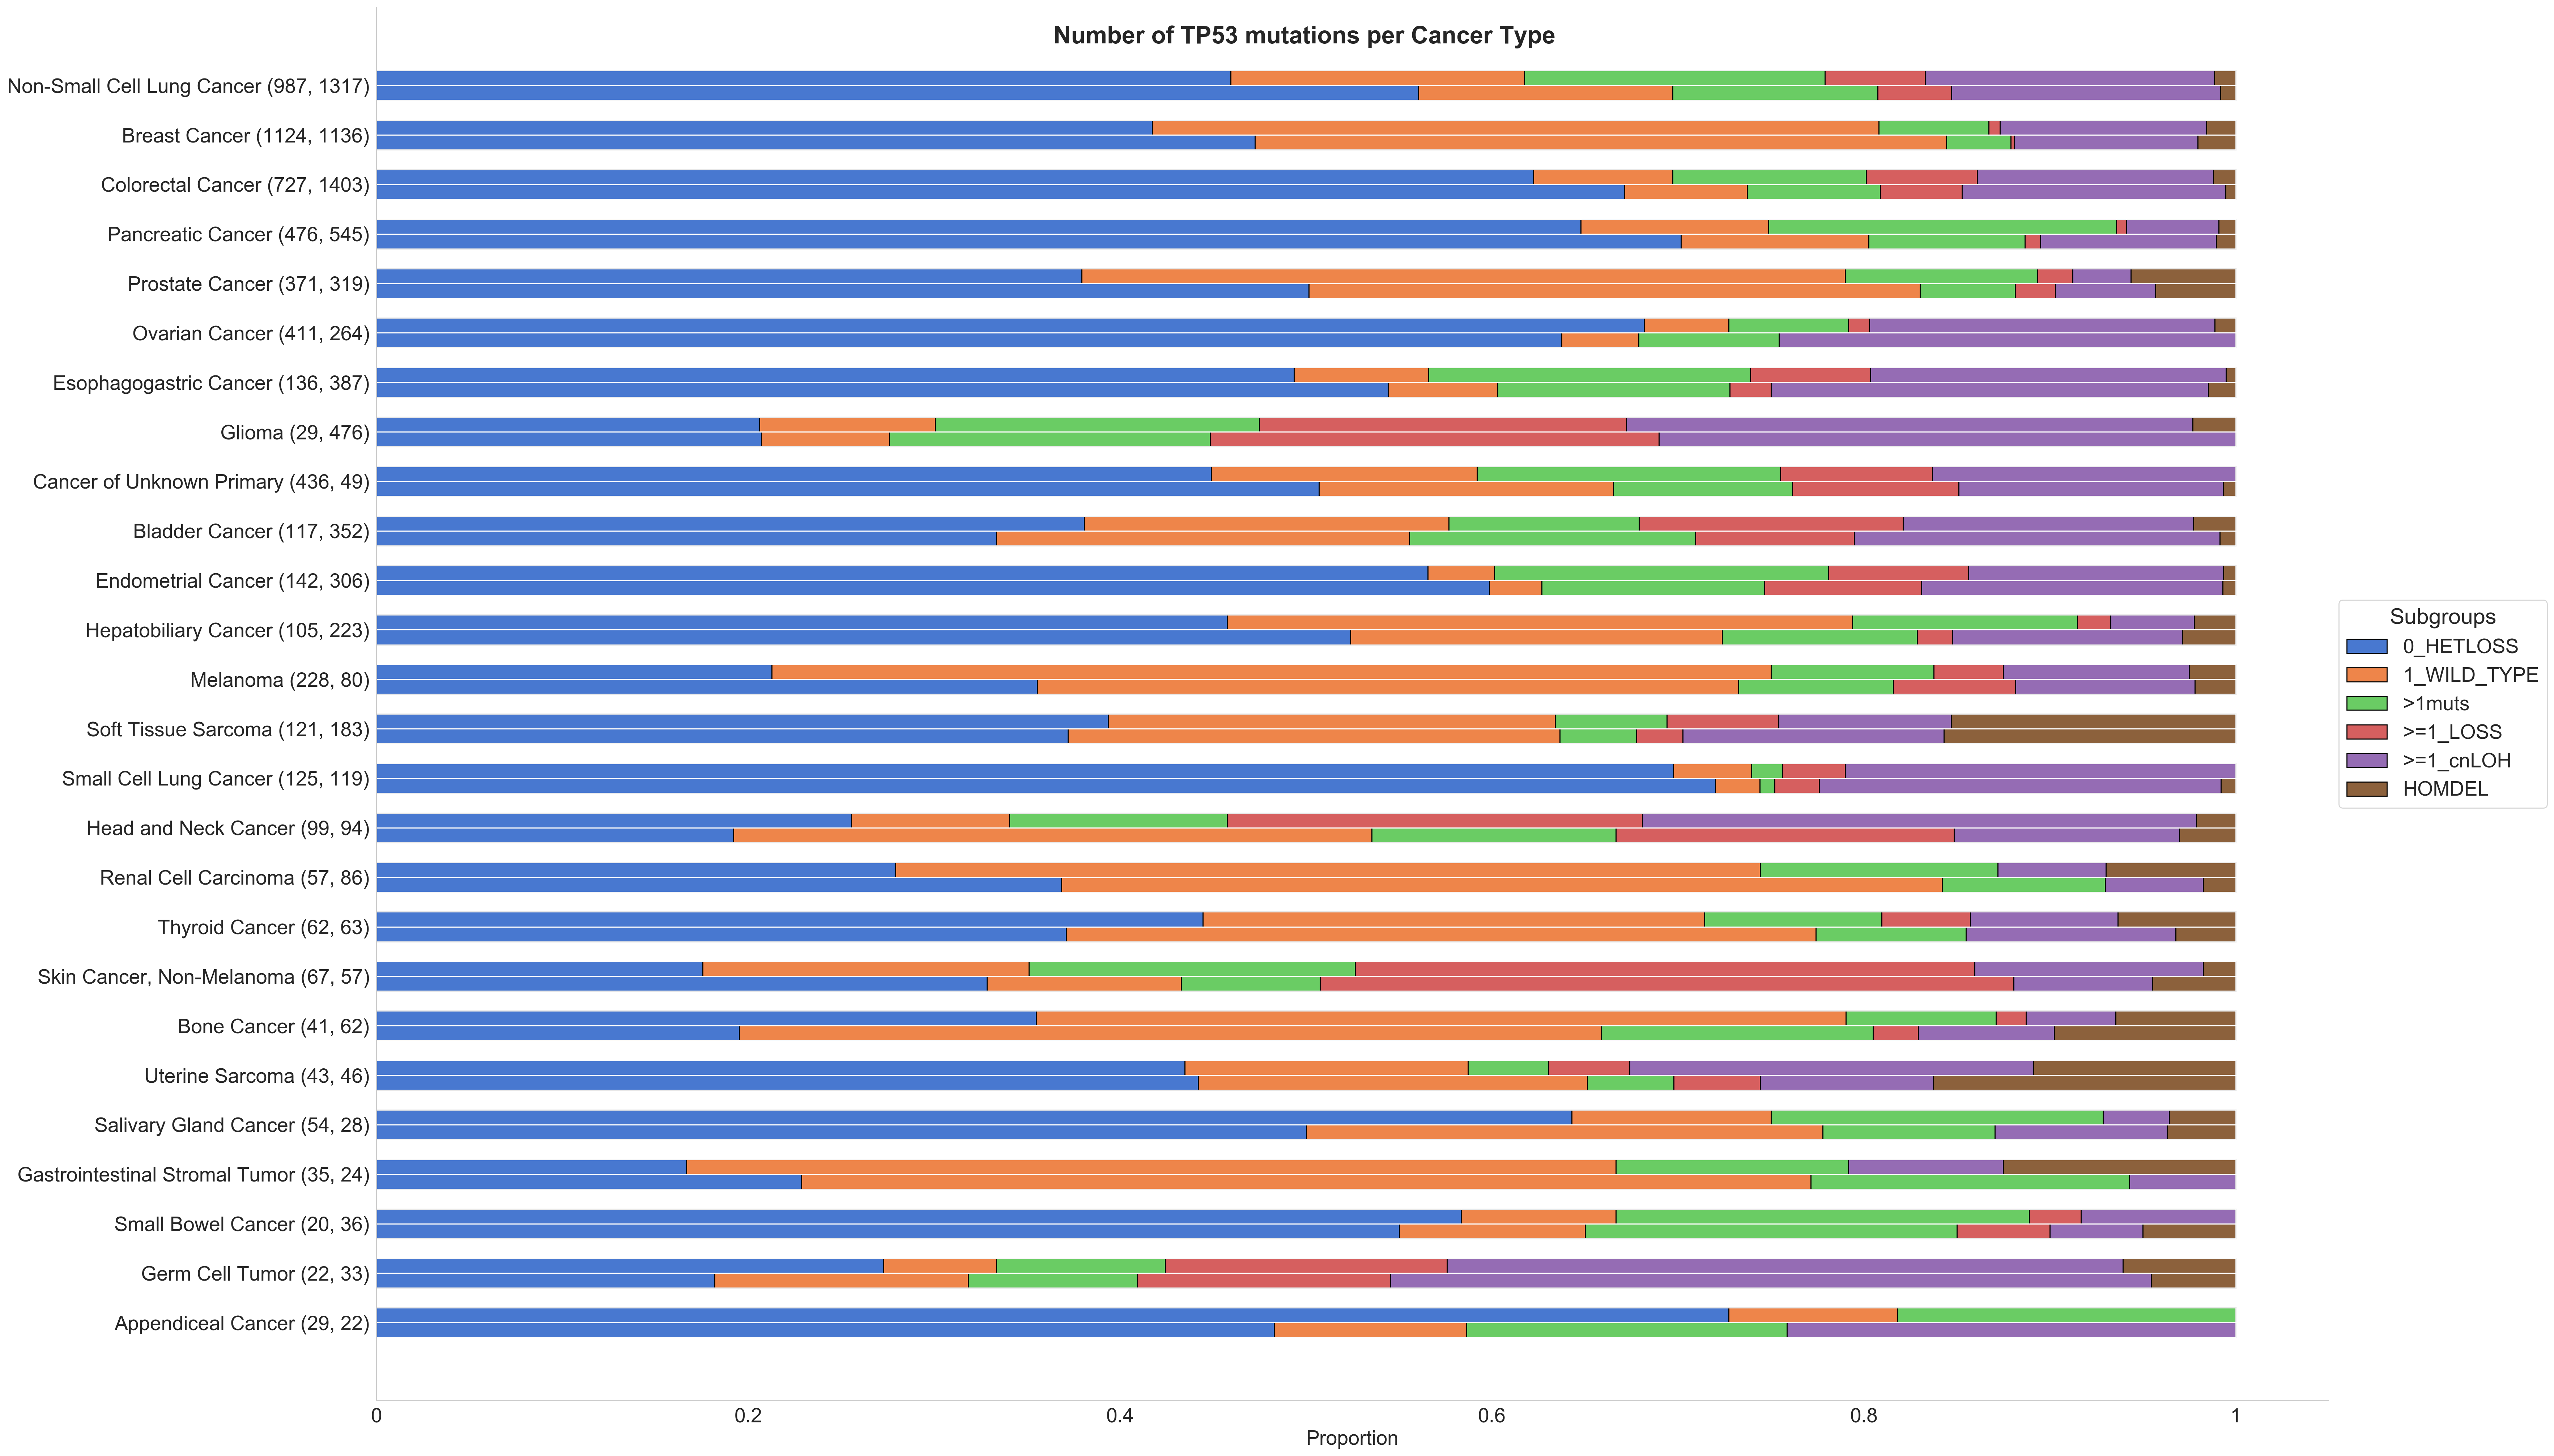

In [108]:
count_met = create_count_table(master, index='Cancer_Type', columns='tp53_group', sample_type='Metastasis', threshold=20)
count_prim = create_count_table(master, index='Cancer_Type', columns='tp53_group', sample_type='Primary', threshold=20)

count_prim_r = count_prim[['0_HETLOSS_r', '1_WILD_TYPE_r', '>1muts_r', '>=1_LOSS_r', '>=1_cnLOH_r', 'HOMDEL_r']]
count_met_r = count_met[['0_HETLOSS_r', '1_WILD_TYPE_r', '>1muts_r', '>=1_LOSS_r', '>=1_cnLOH_r', 'HOMDEL_r']]

# the following allows us to order the plot and have yticks labels
count_prim_sum= count_prim['sum'] ; count_met_sum= count_met['sum']
count = pd.concat([count_prim_sum, count_met_sum], axis=1, join='inner')
count.columns=['sum_prim', 'sum_met']
count['SUM'] = count.sum(axis=1)

cancer_list = list(count.sort_values(by=['SUM']).index)
prim_number = [int(x) for x in count.sort_values(by=['SUM'])['sum_prim']]
met_number =  [int(x) for x in count.sort_values(by=['SUM'])['sum_met']]
numbers = list(zip(met_number, prim_number))
cancer_number = [i + ' ' + str(j) for i, j in zip(cancer_list, numbers)] 

comp = build_comparison_table([count_prim_r,count_met_r], ['Metastasis', 'Primary'],column_name='Scenarios', reindex=cancer_list)
comp = comp[['>=1_LOSS_r', '0_HETLOSS_r','1_WILD_TYPE_r', '>1muts_r','>=1_cnLOH_r', 'HOMDEL_r']]
ax, fig = plot_grouped_stackedbars(comp, ix_categories='Cancer_Type', ix_entities_compared='Scenarios', norm=None, xaxis_label='Proportion',figsize = (30,20), width=0.3)
fig.suptitle('Number of TP53 mutations per Cancer Type', weight = 'bold', fontsize=24)

ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_yticklabels(cancer_number, fontsize=20)
ax.set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=20)
ax.set_xlabel('Proportion', fontsize=20)
leg = ax.legend(['0_HETLOSS', '1_WILD_TYPE', '>1muts', '>=1_LOSS', '>=1_cnLOH', 'HOMDEL'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)
leg.set_title('Subgroups',prop={'size':22})

plt.show()

## Purity / max_vaf differences across cancer types

In this part we define function to have a boxplot of the purity for the cancers we want.

In [117]:
def boxplot_cancer(df, metrics, thr = None, sample_type=None, order_by = 'median', figsize=(16,15), comparison=False):
    
    fig = plt.figure(figsize=figsize)
    ax1 = plt.subplot2grid(shape=(1, 1), loc=(0, 0), colspan=1)
    
    # If we put a threshold, we define a cancer_list 
    if thr:
        cancer_number = get_groupby(df, 'Cancer_Type', 'count')
        cancer_list_thr = list(cancer_number[cancer_number['count']>=thr].index)
        df_bis = df[df['Cancer_Type'].isin(cancer_list_thr)]
    else: df_bis=df
    
    # To sort in decreasing median order OR in decreasing number of samples
    if order_by == 'median':
        result = df_bis.groupby(["Cancer_Type"])[metrics].aggregate(
                np.median).reset_index().sort_values(metrics,
                                                     ascending=False)
    if order_by == 'count':
        result = df_bis.groupby(["Cancer_Type"])[metrics].size().reset_index().sort_values(metrics,
                                                     ascending=False)
    # To have the numbers per cancer_type
    h = get_groupby(df_bis, 'Cancer_Type', 'count')
    numbers = []
    for cancer in list(result.Cancer_Type):
        numbers.append(int(h[h.index == cancer]['count']))
    cancer_number = [i + ' (' + str(j) + ')' for i, j in zip(list(result.Cancer_Type), numbers)]

    if comparison:
        sns.boxplot(y="Cancer_Type",
                x=metrics,
                data=df_bis,
                ax=ax1,
                dodge=True,
                hue='Sample_Type',
                palette=list(sns.color_palette("muted")),
                order=result['Cancer_Type'])
    
    else:
        sns.boxplot(y="Cancer_Type",
                    x=metrics,
                    data=df_bis,
                    ax=ax1,
                    dodge=False,
                    color=list(sns.color_palette("muted"))[0],
                    order=result['Cancer_Type'])

    for i,artist in enumerate(ax1.artists):
        # Set the linecolor on the artist to the facecolor, and set the facecolor to None
        col = artist.get_facecolor()
        artist.set_edgecolor(col)
        artist.set_facecolor('None')

        # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
        # Loop over them here, and use the same colour as above
        for j in range(i*6,i*6+6):
            line = ax1.lines[j]
            if j%6 == 4 : line.set_color('black')
            else: line.set_color(col)
            line.set_mfc('None')
            line.set_mec('None')

    ax1.set_yticklabels(cancer_number, fontsize=12)
    
    return fig, ax1, result

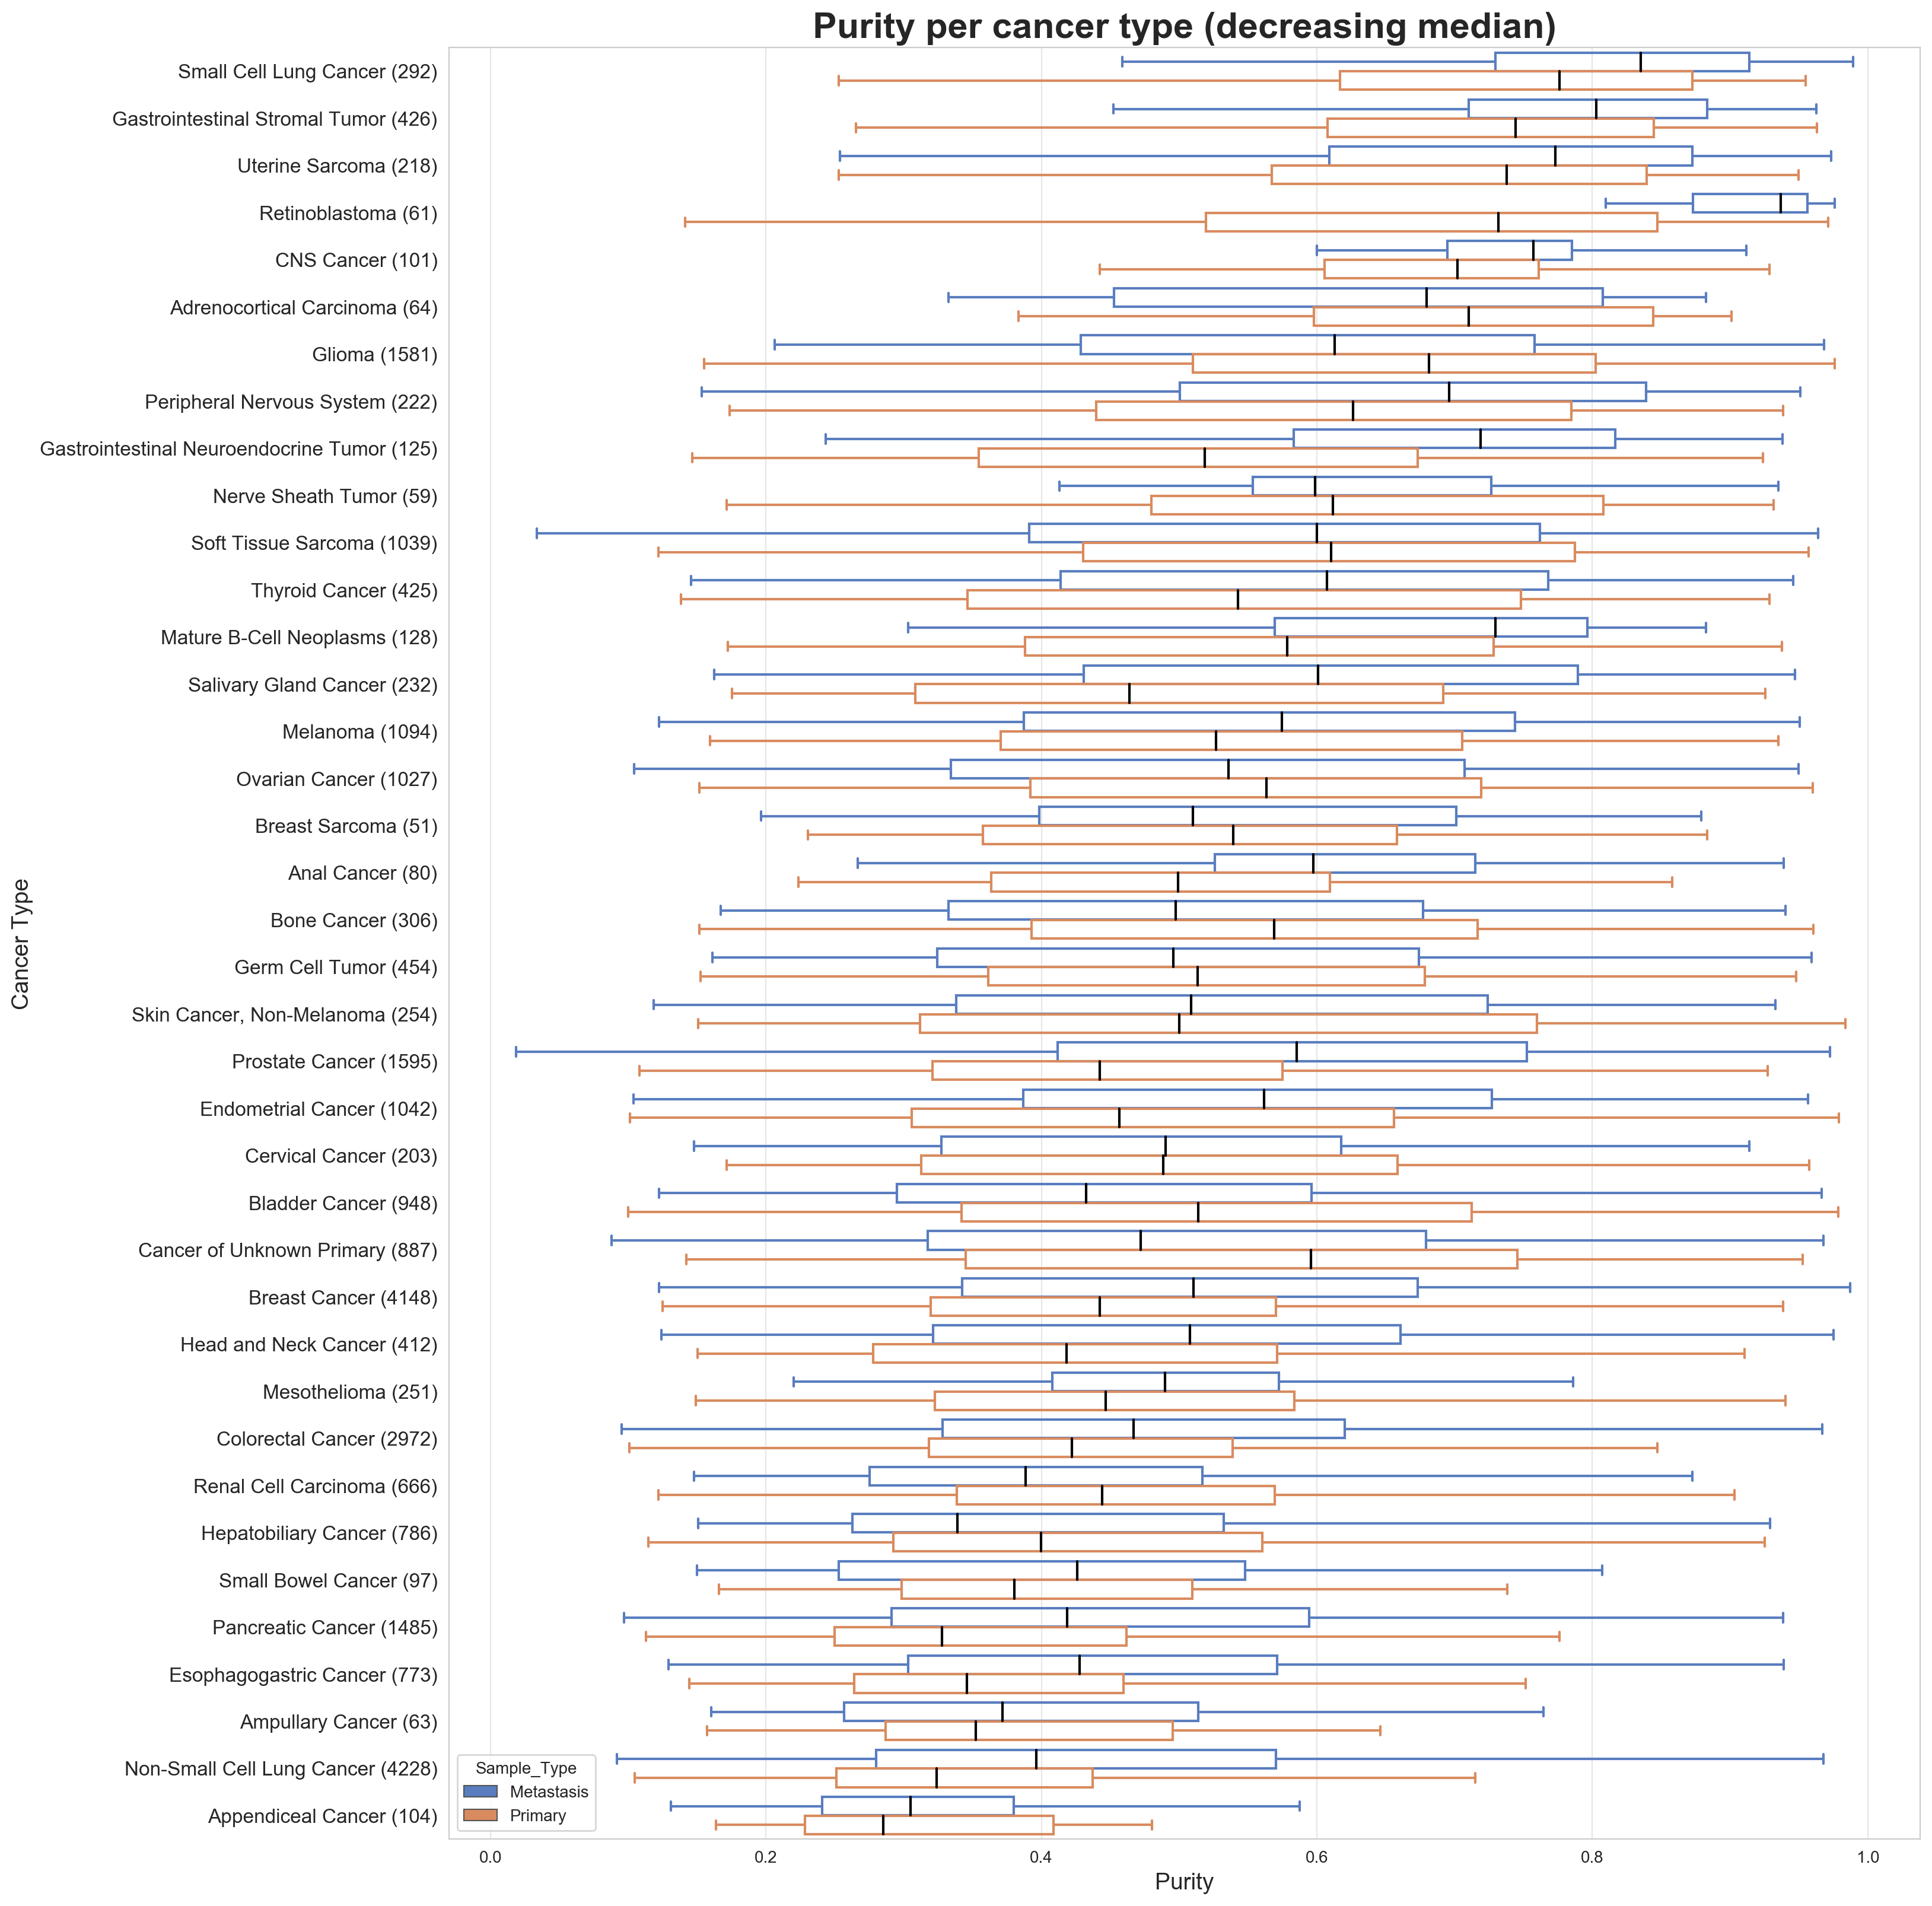

In [118]:
sns.set_style("whitegrid", {'grid.color': '.9'})
fig, ax, result_purity = boxplot_cancer(master, 'purity', order_by = 'median', thr=50, sample_type=None, figsize=(16,20), comparison=True)
ax.set_title('Purity per cancer type (decreasing median)', weight='bold', fontsize=22)
ax.set_ylabel('Cancer Type', fontsize=14)
ax.set_xlabel('Purity', fontsize=14)
plt.show()

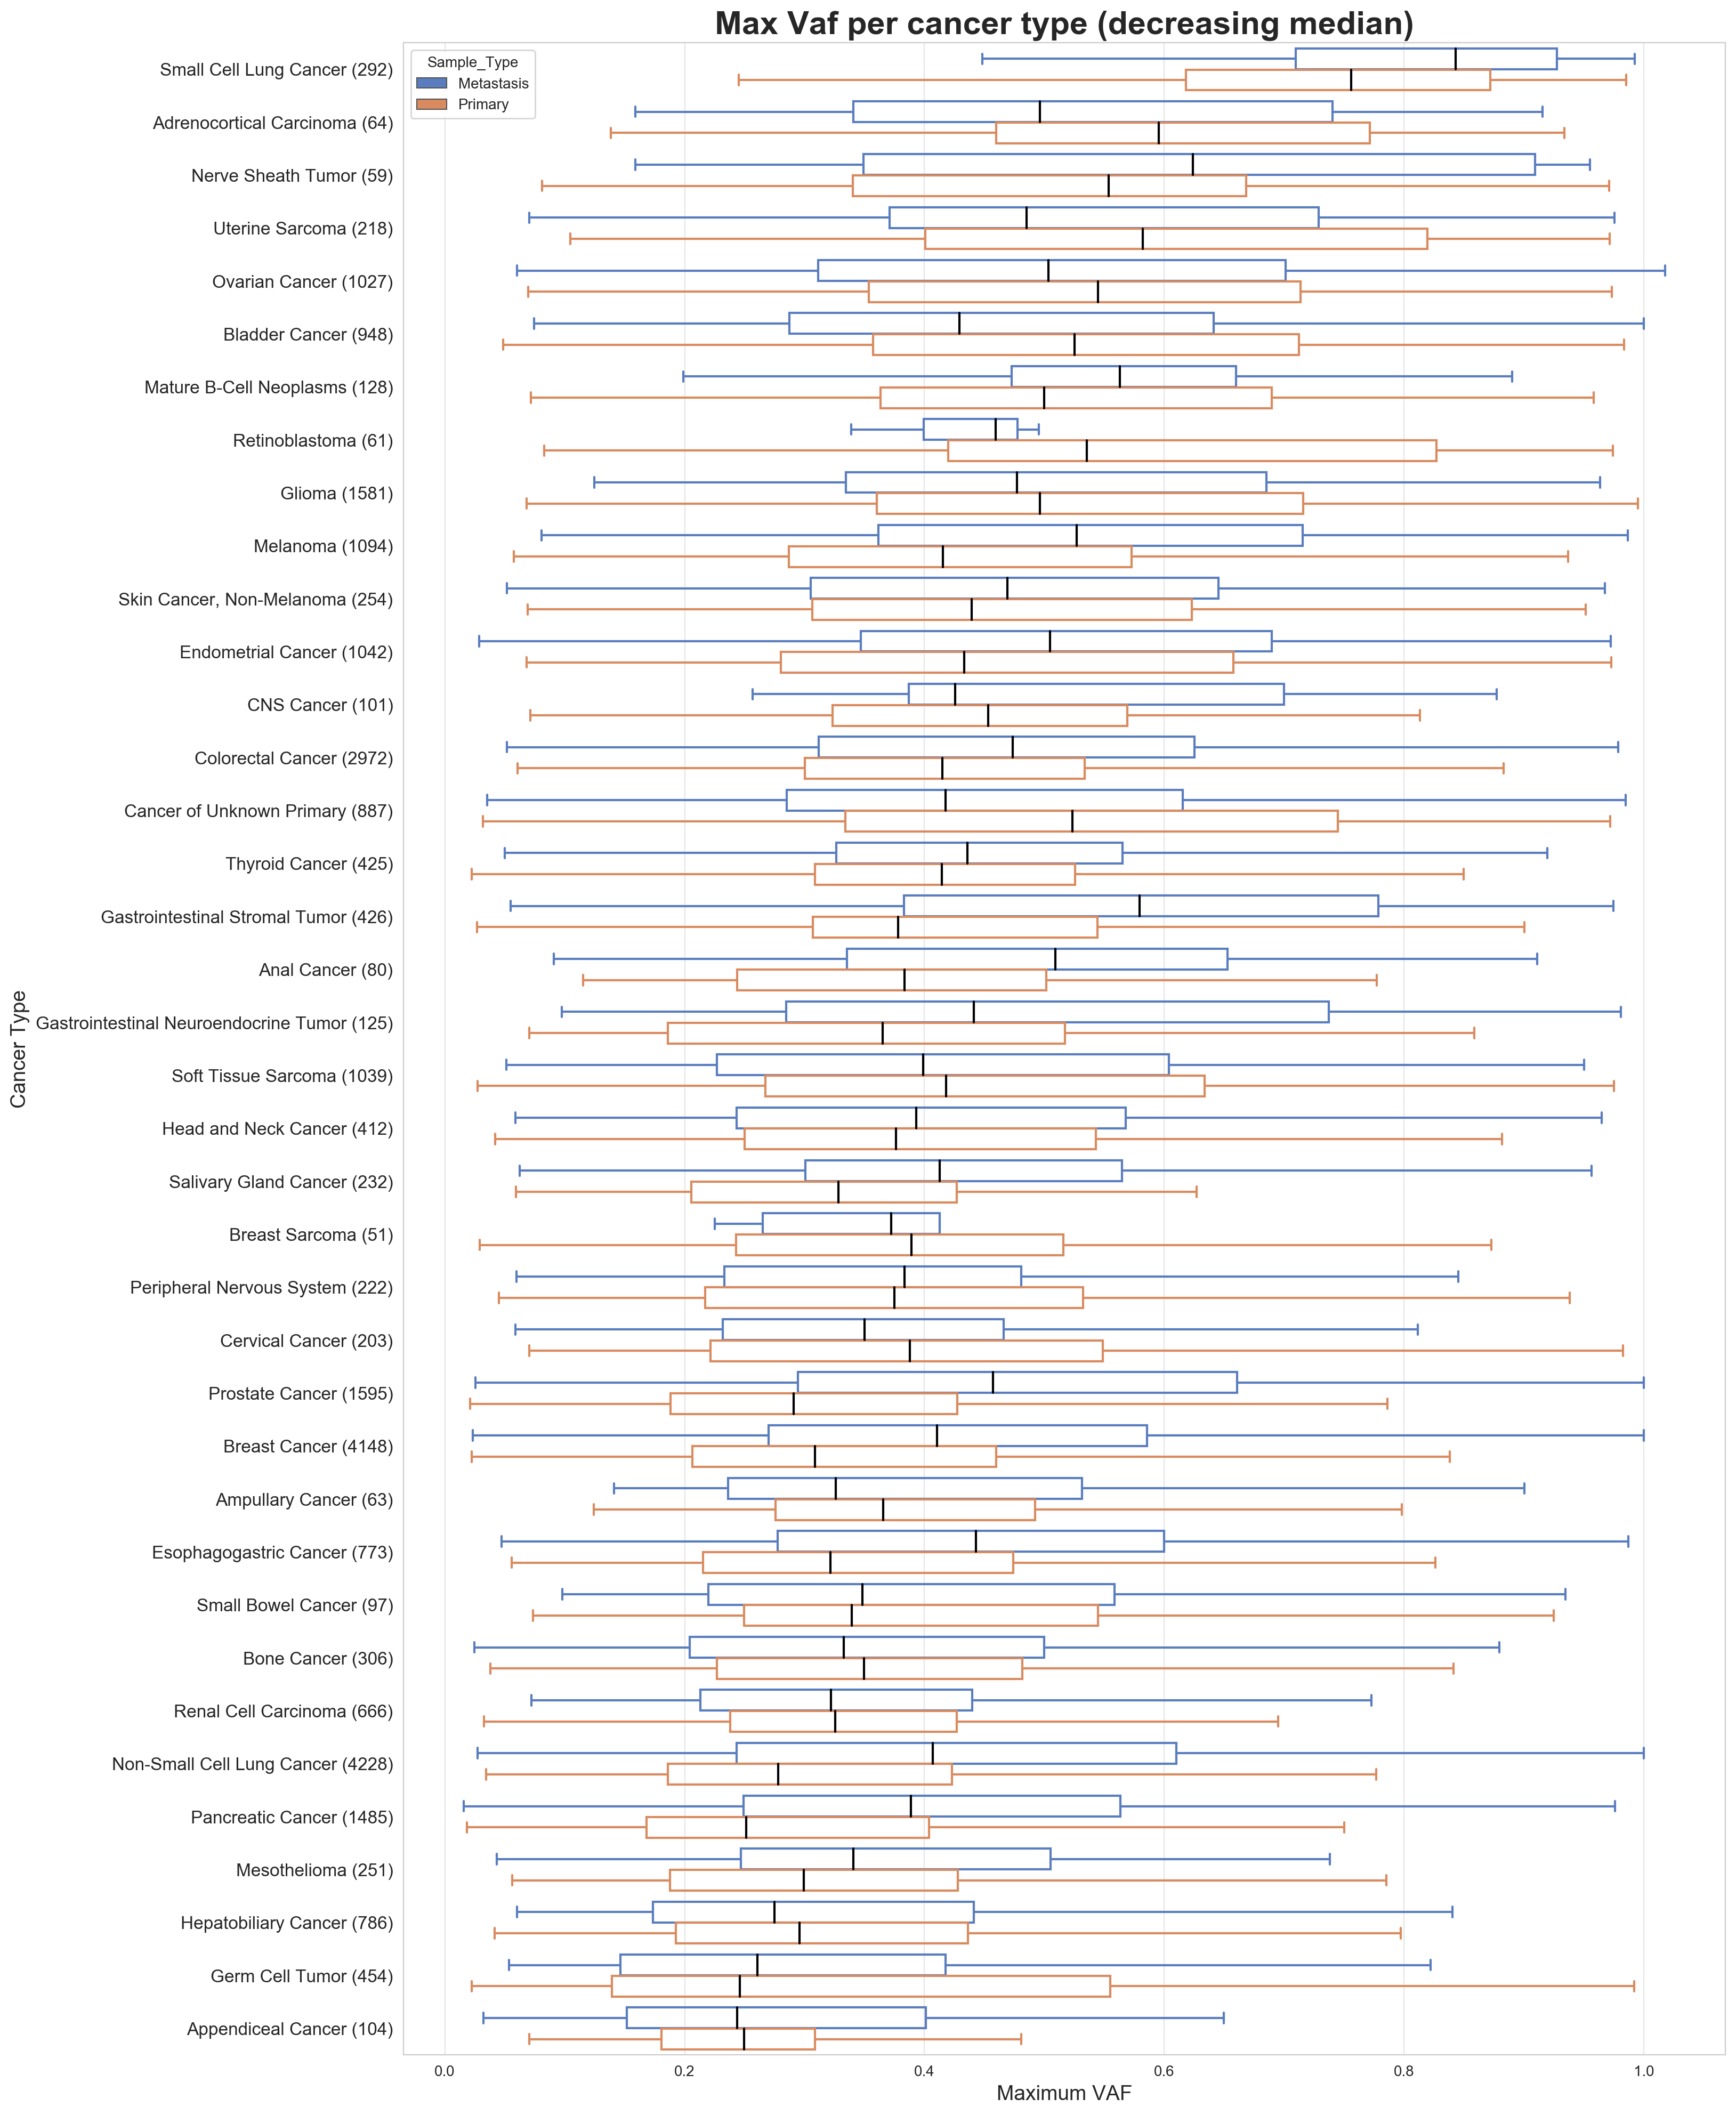

In [123]:
fig, ax, result_maxvaf= boxplot_cancer(master, 'max_vaf', sample_type=None, order_by='median', figsize=(16,25), thr=50, comparison=True)

ax.set_title('Max Vaf per cancer type (decreasing median)', weight='bold', fontsize=22)
ax.set_ylabel('Cancer Type', fontsize=14)
ax.set_xlabel('Maximum VAF', fontsize=14)
plt.show()

In [139]:
# In this cell we output the rank table that allows to see the cancers that have 
# the biggest differences in purity/max_vaf

try: result_purity = result_purity.reset_index()
except: pass
result_purity['rank_purity'] = result_purity.index
result_purity = result_purity[['Cancer_Type', 'purity','rank_purity']]

try: result_maxvaf = result_maxvaf.reset_index()
except: pass
result_maxvaf['rank_maxvaf'] = result_maxvaf.index
result_maxvaf = result_maxvaf[['Cancer_Type', 'max_vaf','rank_maxvaf']]

ranks = pd.merge(result_purity, result_maxvaf, on=['Cancer_Type'])[['Cancer_Type', 'purity', 'max_vaf', 'rank_purity', 'rank_maxvaf']]
ranks['rank_diff'] = ranks.apply(lambda x: abs(x.rank_maxvaf - x.rank_purity), axis=1)
ranks = ranks.sort_values(by=['rank_diff'], ascending=False)
ranks

,Cancer_Type,purity,max_vaf,rank_purity,rank_maxvaf,rank_diff
24,Bladder Cancer,0.485743,0.510638,24,5,19
19,Germ Cell Tumor,0.505544,0.253542,19,36,17
7,Peripheral Nervous System,0.665545,0.378049,7,23,16
29,Colorectal Cancer,0.433627,0.427003,29,13,16
1,Gastrointestinal Stromal Tumor,0.767902,0.421179,1,16,15
18,Bone Cancer,0.527433,0.346632,18,30,12
25,Cancer of Unknown Primary,0.482907,0.423913,25,14,11
22,Endometrial Cancer,0.494065,0.456296,22,11,11
15,Ovarian Cancer,0.544538,0.522727,15,4,11
8,Gastrointestinal Neuroendocrine Tumor,0.629754,0.406308,8,18,10


In [146]:
master[master['tp53_group'] == '1_WILD_TYPE'][master['tp53_cn_state'] == 'DIPLOID'][master['tp53_exp_nb_1'] >=1.95]

count    57.000000
mean      0.399887
std       0.258082
min       0.132544
25%       0.204142
50%       0.268258
75%       0.550159
max       0.915385
Name: tp53_vaf_1, dtype: float64

In [148]:
master[master['tp53_group'] == '1_WILD_TYPE'][master['tp53_cn_state'] == 'DIPLOID'][master['tp53_exp_nb_1'] >=1.95][master['tp53_vaf_1'] >=0.60]

,Sample_Id,Tumor_Id,Patient_Id,Cancer_Type,Cancer_Type_Detailed,Sample_Type,purity,ploidy,samples_per_patient,Overall Survival Status,Overall Survival (Months),MSI Score,TMB_Score,tp53_key_1,tp53_vc_1,tp53_ccf_1,tp53_vaf_1,tp53_HGVSp_1,tp53_spot_1,tp53_key_2,tp53_vc_2,tp53_ccf_2,tp53_vaf_2,tp53_HGVSp_2,tp53_spot_2,tp53_key_3,tp53_vc_3,tp53_ccf_3,tp53_vaf_3,tp53_HGVSp_3,tp53_spot_3,tp53_key_4,tp53_vc_4,tp53_ccf_4,tp53_vaf_4,tp53_HGVSp_4,tp53_spot_4,tp53_key_5,tp53_vc_5,tp53_ccf_5,tp53_vaf_5,tp53_HGVSp_5,tp53_spot_5,tp53_count,tp53_tcn,tp53_mcn,tp53_lcn,tp53_seg_length,tp53_cn_state,cf,wgd,mutation_count,gene_count,max_vaf,tp53_exp_nb_1,tp53_exp_nb_2,tp53_exp_nb_3,tp53_exp_nb_4,tp53_exp_nb_5,tp53_first_group,tp53_group,chr_affected,chr_loss,chr_gain,chr_cnloh,frac_genome_altered,tp53_vc_group_1,tp53_vc_group_2,tp53_vc_group_3,tp53_vc_group_4,tp53_vc_group_5
1726,P-0009309-T01-IM5_P-0009309-N01-IM5,P-0009309-T01-IM5,P-0009309,Glioma,Astrocytoma,Primary,0.544264,1.913367,1.0,LIVING,NaN,0.09,4.9,P-0009309-T01-IM5_17_7577539_G_A,Missense_Mutation,1.0,0.735032,p.Arg248Trp,248,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,1,2.0,1.0,1.0,21421337.0,DIPLOID,1.0,-1.0,6,6.0,0.735032,2.701010,NaN,NaN,NaN,NaN,WILD_TYPE,1_WILD_TYPE,5,3,1,1,0.164,missense,None,None,None,None
2083,P-0003533-T01-IM5_P-0003533-N01-IM5,P-0003533-T01-IM5,P-0003533,Germ Cell Tumor,Mixed Germ Cell Tumor,Primary,0.776097,1.902289,2.0,DECEASED,19.200,0.92,2.0,P-0003533-T01-IM5_17_7578499_T_-,Frame_Shift_Del,1.0,0.784314,p.Gln144ArgfsTer26,144,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,1,2.0,1.0,1.0,37504661.0,DIPLOID,1.0,-1.0,2,2.0,0.836923,2.021175,NaN,NaN,NaN,NaN,WILD_TYPE,1_WILD_TYPE,7,4,2,1,0.264,truncated,None,None,None,None
3128,P-0003820-T01-IM5_P-0003820-N01-IM5,P-0003820-T01-IM5,P-0003820,Glioma,Anaplastic Astrocytoma,Primary,0.873180,1.897820,1.0,LIVING,41.194,0.10,4.9,P-0003820-T01-IM5_17_7578397_T_G,Missense_Mutation,1.0,0.908078,p.His178Pro,178,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,1,2.0,1.0,1.0,30185446.0,DIPLOID,1.0,-1.0,5,5.0,0.908078,2.079933,NaN,NaN,NaN,NaN,WILD_TYPE,1_WILD_TYPE,1,1,0,0,0.070,missense,None,None,None,None
5743,P-0012692-T01-IM5_P-0012692-N01-IM5,P-0012692-T01-IM5,P-0012692,Glioma,Anaplastic Astrocytoma,Primary,0.768515,2.084384,1.0,DECEASED,6.016,0.75,4.9,P-0012692-T01-IM5_17_7577153_C_A,Missense_Mutation,1.0,0.815160,p.Gly262Val,262,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,1,2.0,1.0,1.0,30916181.0,DIPLOID,1.0,-1.0,5,5.0,0.815160,2.121388,NaN,NaN,NaN,NaN,WILD_TYPE,1_WILD_TYPE,8,7,1,0,0.245,missense,None,None,None,None
6696,P-0011279-T01-IM5_P-0011279-N01-IM5,P-0011279-T01-IM5,P-0011279,Glioma,Anaplastic Astrocytoma,Primary,0.880804,1.940858,1.0,LIVING,4.603,0.48,3.0,P-0011279-T01-IM5_17_7578286_A_-,Frame_Shift_Del,1.0,0.882948,p.Leu188ArgfsTer59,188,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,1,2.0,1.0,1.0,30916087.0,DIPLOID,1.0,-1.0,3,3.0,0.882948,2.004868,NaN,NaN,NaN,NaN,WILD_TYPE,1_WILD_TYPE,2,1,1,0,0.066,truncated,None,None,None,None
8065,P-0025331-T01-IM6_P-0025331-N01-IM6,P-0025331-T01-IM6,P-0025331,Glioma,Anaplastic Astrocytoma,Primary,0.418143,1.997688,1.0,LIVING,25.414,0.27,3.5,P-0025331-T01-IM6_17_7577120_C_T,Missense_Mutation,NaN,0.902894,p.Arg273His,273,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,1,2.0,1.0,1.0,17012921.0,DIPLOID,1.0,-1.0,4,4.0,0.902894,4.318593,NaN,NaN,NaN,NaN,WILD_TYPE,1_WILD_TYPE,9,7,1,1,0.306,missense,None,None,None,None
11450,P-0010354-T01-IM5_P-0010354-N01-IM5,P-0010354-T01-IM5,P-0010354,Glioma,Anaplastic Astrocytoma,Primary,0.825809,1.906590,1.0,DECEASED,4.570,0.35,3.9,P-0010354-T01-IM5_17_757